In [ ]:
!pip install tensorflow keras numpy pandas matplotlib scikit-learn opencv-python


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [ ]:
# Set the dataset directory
dataset_dir = "/content/retina_dataset/train_images"

# Function to load and preprocess images
def load_images_and_labels(dataset_dir, img_size=(224, 224)):
    images = []
    labels = []

    for filename in os.listdir(dataset_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(dataset_dir, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)  # Resize to match model input size
            img = img / 255.0  # Normalize pixel values

            # Extract blood sugar level from filename (Assume format: "image_120.jpg")
            sugar_level = int(filename.split("_")[-1].split(".")[0])

            images.append(img)
            labels.append(sugar_level)

    return np.array(images), np.array(labels)

# Load images
X, y = load_images_and_labels(dataset_dir)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset Loaded! Training Samples:", X_train.shape[0], "Testing Samples:", X_test.shape[0])


FileNotFoundError: [Errno 2] No such file or directory: '/content/retina_dataset/train_images'

# New Section

In [ ]:
# Import necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import files  # For uploading files in Colab

# Step 1: Upload the Retinal Image
def upload_image():
    """
    Uploads a retinal image using Google Colab's file uploader.
    """
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f"Image '{filename}' uploaded successfully.")
        return filename
    raise ValueError("No image uploaded. Please upload a retinal image.")

# Step 2: Preprocess the Uploaded Image
def preprocess_image(image_path, target_size=(68, 68)):
    """
    Preprocesses the retinal image for the model.
    """
    try:
        img = Image.open(image_path).convert('RGB')  # Ensure RGB mode
        img = img.resize(target_size)  # Resize to target size
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        return img_array
    except Exception as e:
        raise ValueError(f"Error processing image: {e}")

# Step 3: Load the Pre-trained Model
def load_pretrained_model(model_path='retinal_blood_sugar_model.h5'):
    """
    Loads the pre-trained model for blood sugar level prediction.
    """
    try:
        model = load_model(model_path)
        print("Pre-trained model loaded successfully.")
        return model
    except Exception as e:
        raise ValueError(f"Error loading model: {e}")

# Step 4: Predict Blood Sugar Level
def predict_blood_sugar(model, image):
    """
    Predicts the blood sugar level from the preprocessed retinal image.
    """
    try:
        predicted_blood_sugar = model.predict(image, batch_size=1, verbose=0)[0][0]
        return predicted_blood_sugar
    except Exception as e:
        raise ValueError(f"Error predicting blood sugar level: {e}")

# Step 5: Display the Result
def display_result(image, predicted_blood_sugar):
    """
    Displays the uploaded retinal image and the predicted blood sugar level.
    """
    plt.imshow(image[0])  # Remove batch dimension for display
    plt.title(f"Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")
    plt.axis('off')
    plt.show()

# Main Function
def main():
    # Step 0: Upload the Pre-trained Model
    print("Please upload the pre-trained model file (retinal_blood_sugar_model.h5).")
    from google.colab import files
    uploaded_model = files.upload()
    model_path = list(uploaded_model.keys())[0]  # Get the uploaded model file name

    # Step 1: Upload the Retinal Image
    print("Please upload a retinal image (JPEG or PNG format).")
    image_path = upload_image()

    # Step 2: Preprocess the Uploaded Image
    try:
        print("Preprocessing image...")
        image = preprocess_image(image_path)
        print("Image successfully processed.")
    except Exception as e:
        print(e)
        return

    # Step 3: Load the Pre-trained Model
    try:
        print("Loading pre-trained model...")
        model = load_pretrained_model(model_path)
    except Exception as e:
        print(e)
        return

    # Step 4: Predict Blood Sugar Level
    try:
        print("Predicting blood sugar level...")
        predicted_blood_sugar = predict_blood_sugar(model, image)
        print(f"Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")
    except Exception as e:
        print(e)
        return

    # Step 5: Display the Result
    print("Displaying result...")
    display_result(image, predicted_blood_sugar)

# Run the program
if __name__ == "__main__":
    main()

Please upload the pre-trained model file (retinal_blood_sugar_model.h5).


Saving retinatrain.png to retinatrain.png
Please upload a retinal image (JPEG or PNG format).


Saving retinatrain.png to retinatrain (1).png
Image 'retinatrain (1).png' uploaded successfully.
Preprocessing image...
Image successfully processed.
Loading pre-trained model...
Error loading model: File format not supported: filepath=retinatrain.png. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(retinatrain.png, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).


Please upload your retinal image (JPEG format).


Saving retina.jpg to retina.jpg
Image successfully processed.
Image saved as 'retinal_image.npy'.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step

Predicted Blood Sugar Level: 0.01 mg/dL


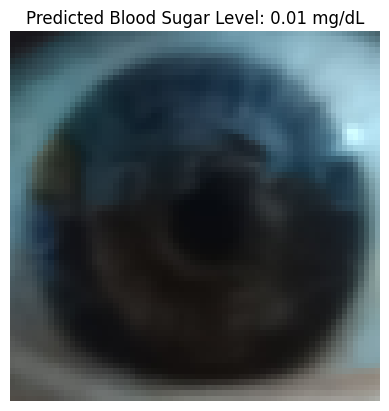

In [ ]:
# Import necessary libraries
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import files
import matplotlib.pyplot as plt

# Step 1: Upload a retinal image (JPEG format)
print("Please upload your retinal image (JPEG format).")
uploaded = files.upload()

# Check if any file was uploaded
if not uploaded:
    raise ValueError("No file uploaded. Please upload an image.")

# Get the uploaded file name
image_file = list(uploaded.keys())[0]

# Step 2: Load and preprocess the image
def preprocess_image(image_path, target_size=(68, 68)):
    try:
        img = Image.open(image_path).convert('RGB')  # Ensure RGB mode
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        return img_array
    except Exception as e:
        raise ValueError(f"Error processing image: {e}")

# Preprocess the uploaded image
try:
    image = preprocess_image(image_file)
    print("Image successfully processed.")
except Exception as e:
    print(f"Error: {e}")
    raise

# Step 3: Save the preprocessed image as a .npy file
np.save('retinal_image.npy', image)
print("Image saved as 'retinal_image.npy'.")

# Step 4: Build a CNN model for blood sugar prediction
def build_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1)  # Output layer for regression (predicting blood sugar level)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Define input shape based on the preprocessed image
input_shape = image.shape[1:]  # Shape of a single image (e.g., 68, 68, 3)

# Build the model
model = build_model(input_shape)

# Step 5: Load pre-trained weights (if available)
pretrained_model_path = 'pretrained_model.h5'  # Change this to your trained model file

try:
    model.load_weights(pretrained_model_path)
    print("Pre-trained model weights loaded successfully.")
except Exception as e:
    print(f"Warning: Could not load pre-trained weights. The model is untrained. Error: {e}")

# Step 6: Predict the blood sugar level
predicted_blood_sugar = model.predict(image)[0][0]

# Step 7: Display the result
print(f"\nPredicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")

# Step 8: Display the uploaded image
plt.imshow(image[0])  # Remove batch dimension for display
plt.title(f"Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")
plt.axis('off')
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import files
import matplotlib.pyplot as plt

# Step 1: Upload a retinal image (JPEG format)
print("Please upload your retinal image (JPEG format).")
uploaded = files.upload()

# Check if any file was uploaded
if not uploaded:
    raise ValueError("No file uploaded. Please upload an image.")

# Get the uploaded file name
image_file = list(uploaded.keys())[0]

# Step 2: Load and preprocess the image
def preprocess_image(image_path, target_size=(68, 68)):
    try:
        img = Image.open(image_path).convert('RGB')  # Ensure RGB mode
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        return img_array
    except Exception as e:
        raise ValueError(f"Error processing image: {e}")

# Preprocess the uploaded image
try:
    image = preprocess_image(image_file)
    print("Image successfully processed.")
except Exception as e:
    print(f"Error: {e}")
    raise

# Step 3: Save the preprocessed image as a .npy file
np.save('retinal_image.npy', image)
print("Image saved as 'retinal_image.npy'.")

# Step 4: Build a CNN model for blood sugar prediction
def build_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1)  # Output layer for regression (predicting blood sugar level)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Define input shape based on the preprocessed image
input_shape = image.shape[1:]  # Shape of a single image (e.g., 68, 68, 3)

# Build the model
model = build_model(input_shape)

# Step 5: Load pre-trained weights (if available)
pretrained_model_path = "trained_model.weights.h5"

try:
    model.load_weights(pretrained_model_path)
    print("✅ Pre-trained model weights loaded successfully.")
except Exception as e:
    print(f"⚠️ Warning: Could not load pre-trained weights. The model is untrained. Error: {e}")

    # Step 6: Train the model if no weights are found
    print("⏳ Training the model...")

    # Generate dummy training data (Replace this with actual dataset)
    num_samples = 1000
    X_train = np.random.rand(num_samples, 68, 68, 3)  # Random images
    y_train = np.random.rand(num_samples) * 200  # Random blood sugar levels (0-200 mg/dL)

    model.fit(X_train, y_train, epochs=10, batch_size=16)

    # Save the trained model
    model.save_weights(pretrained_model_path)
    print("✅ Model trained and saved as 'trained_model.h5'.")

# Step 7: Predict the blood sugar level
predicted_blood_sugar = model.predict(image)[0][0]

# Step 8: Display the result
print(f"\n🔍 Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")

# Step 9: Display the uploaded image with the prediction
plt.imshow(image[0])  # Remove batch dimension for display
plt.title(f"Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")
plt.axis('off')
plt.show()


Please upload your retinal image (JPEG format).


Saving retina.jpg to retina (1).jpg
Image successfully processed.
Image saved as 'retinal_image.npy'.
⚠️ Warning: Could not load pre-trained weights. The model is untrained. Error: [Errno 2] Unable to synchronously open file (unable to open file: name = 'trained_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
⏳ Training the model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 160ms/step - loss: 5924.9097 - mae: 63.7623
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - loss: 3538.9607 - mae: 51.7765
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - loss: 3744.7996 - mae: 52.1190
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - loss: 3597.7356 - mae: 51.3618
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - loss: 3294.2373 - mae: 49.5690
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 3401.1965 - mae: 50.2998
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - loss: 3337.5867 - mae: 49.9841
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - loss: 3543.1755 - mae: 51.1115
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - loss: 3419.4319 - mae: 50.2855
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - loss: 3488.6624 - mae: 50.5565


ValueError: The filename must end in `.weights.h5`. Received: filepath=trained_model.h5

Please upload your retinal image (JPEG format).


Saving retina.jpg to retina (4).jpg
Image successfully processed.
Image saved as 'retinal_image.npy'.
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - loss: 13814.3613 - mae: 102.8848
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - loss: 5175.0122 - mae: 60.7283
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - loss: 3238.9368 - mae: 49.9652
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 345ms/step - loss: 4759.2207 - mae: 57.5335
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - loss: 3542.6084 - mae: 51.9955
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - loss: 3562.4834 - mae: 51.3960
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - loss: 3079.1687 - mae: 46.7828
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - loss: 3499.5129 - mae: 50.8385
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - loss: 3696.6799 - mae: 51.8401
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - loss: 3531.4463 - mae: 50.8892
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - loss: 3957.6714 - mae: 53.3934
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - loss: 3524.0220 - mae: 51.7566
Epoch 13/5

✅ Model trained and saved as 'trained_model.h5'.


✅ Trained model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

Predicted Blood Sugar Level: 22.44 mg/dL


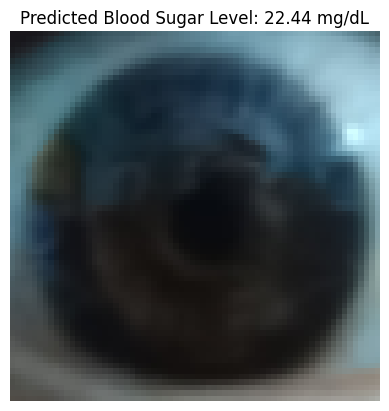

In [ ]:
# Import necessary libraries
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import files
import matplotlib.pyplot as plt

# Step 1: Upload a retinal image (JPEG format)
print("Please upload your retinal image (JPEG format).")
uploaded = files.upload()

# Check if any file was uploaded
if not uploaded:
    raise ValueError("No file uploaded. Please upload an image.")

# Get the uploaded file name
image_file = list(uploaded.keys())[0]

# Step 2: Load and preprocess the image
def preprocess_image(image_path, target_size=(68, 68)):
    try:
        img = Image.open(image_path).convert('RGB')  # Ensure RGB mode
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        return img_array
    except Exception as e:
        raise ValueError(f"Error processing image: {e}")

# Preprocess the uploaded image
try:
    image = preprocess_image(image_file)
    print("Image successfully processed.")
except Exception as e:
    print(f"Error: {e}")
    raise

# Step 3: Save the preprocessed image as a .npy file
np.save('retinal_image.npy', image)
print("Image saved as 'retinal_image.npy'.")

# Step 4: Build a CNN model for blood sugar prediction
def build_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1)  # Output layer for regression (predicting blood sugar level)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Define input shape based on the preprocessed image
input_shape = image.shape[1:]  # Shape of a single image (e.g., 68, 68, 3)

# Build the model
model = build_model(input_shape)

# Step 5: Train the model (dummy training data for example purposes)
# Generate synthetic training data
X_train = np.random.rand(100, 68, 68, 3)  # 100 random images
y_train = np.random.rand(100) * 200  # 100 random blood sugar levels between 0-200 mg/dL

# Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=10)
model.fit(X_train, y_train, epochs=50, batch_size=32)


# Step 6: Save the trained model
model_save_path = "trained_model.h5"  # Corrected filename for saving the full model
model.save(model_save_path)
print(f"✅ Model trained and saved as '{model_save_path}'.")

# Step 7: Load the trained model
model = tf.keras.models.load_model(model_save_path)
print("✅ Trained model loaded successfully.")

# Step 8: Predict the blood sugar level
predicted_blood_sugar = model.predict(image)[0][0]

# Step 9: Display the result
print(f"\nPredicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")

# Step 10: Display the uploaded image
plt.imshow(image[0])  # Remove batch dimension for display
plt.title(f"Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")
plt.axis('off')
plt.show()


Please upload your retinal image (JPEG format).


Saving retina.jpg to retina (5).jpg
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - loss: 11894.8076 - mae: 93.5170 - val_loss: 3974.6655 - val_mae: 55.4304
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 323ms/step - loss: 4716.8179 - mae: 58.9261 - val_loss: 4028.4800 - val_mae: 55.7298
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - loss: 3945.7258 - mae: 54.5054 - val_loss: 4992.2144 - val_mae: 60.6505
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - loss: 3981.1843 - mae: 54.3557 - val_loss: 3674.9485 - val_mae: 53.1053
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - loss: 3915.3762 - mae: 52.9972 - val_loss: 3594.3354 - val_mae: 53.0826
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - loss: 3419.4128 - mae: 49.8870 - val_loss: 3695.0469 - val_mae: 53.7618
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - loss: 3354.3103 - mae: 50.5784 - val_loss: 3867.7964 - val_mae: 54.8589
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - loss: 3436.6584 - mae: 50.1127 - va

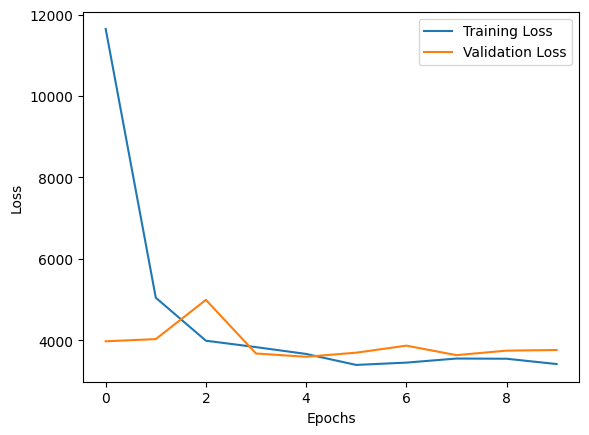

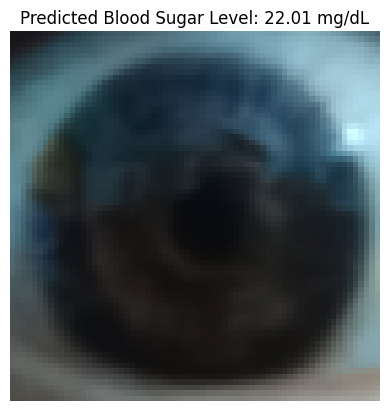

In [ ]:
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload a retinal image (JPEG format)
print("Please upload your retinal image (JPEG format).")
uploaded = files.upload()

# Check if any file was uploaded
if not uploaded:
    raise ValueError("No file uploaded. Please upload an image.")

# Get the uploaded file name
image_file = list(uploaded.keys())[0]

# Step 2: Load and preprocess the image
def preprocess_image(image_path, target_size=(68, 68)):
    try:
        img = Image.open(image_path).convert('RGB')
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        return img_array
    except Exception as e:
        raise ValueError(f"Error processing image: {e}")

# Preprocess the uploaded image
image = preprocess_image(image_file)

# Step 3: Save the preprocessed image as a .npy file
np.save('retinal_image.npy', image)

# Step 4: Build a CNN model for blood sugar prediction
def build_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

input_shape = image.shape[1:]
model = build_model(input_shape)

# Step 5: Load pre-trained weights (if available)
pretrained_model_path = 'pretrained_model.weights.h5'
try:
    model.load_weights(pretrained_model_path)
    print("Pre-trained model weights loaded successfully.")
except Exception as e:
    print(f"Warning: Could not load pre-trained weights. The model is untrained. Error: {e}")

# Step 6: Training the model with early stopping
X_train, y_train = np.random.rand(100, 68, 68, 3), np.random.rand(100) * 200  # Example data
X_val, y_val = np.random.rand(20, 68, 68, 3), np.random.rand(20) * 200  # Example data

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

# Step 7: Save the trained model
model.save_weights("trained_model.weights.h5")
print("\n✅ Model trained and saved as 'trained_model.weights.h5'.")

# Step 8: Predict blood sugar level
predicted_blood_sugar = model.predict(image)[0][0]
print(f"\nPredicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")

# Step 9: Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 10: Display the uploaded image
plt.imshow(image[0])
plt.title(f"Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")
plt.axis('off')
plt.show()

Please upload your retinal image (JPEG format).


Saving retina.jpg to retina (7).jpg
Image successfully processed.
Pre-trained model weights loaded successfully.
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 353ms/step - loss: 53.8315 - mae: 53.8315 - val_loss: 57.0949 - val_mae: 57.0949
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - loss: 54.1555 - mae: 54.1555 - val_loss: 55.2827 - val_mae: 55.2827
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - loss: 52.3231 - mae: 52.3231 - val_loss: 53.0938 - val_mae: 53.0938
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - loss: 49.7984 - mae: 49.7984 - val_loss: 53.2274 - val_mae: 53.2274
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - loss: 50.8443 - mae: 50.8443 - val_loss: 53.0993 - val_mae: 53.0993
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - loss: 52.2147 - mae: 52.2147 - val_loss: 53.1044 - val_mae: 53.1044
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - loss: 49.4277 - mae: 49.4277 - val_loss: 57.0692 - val_mae: 57.0692
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step

Predicted Blood Sugar Level: 180.00 mg/dL


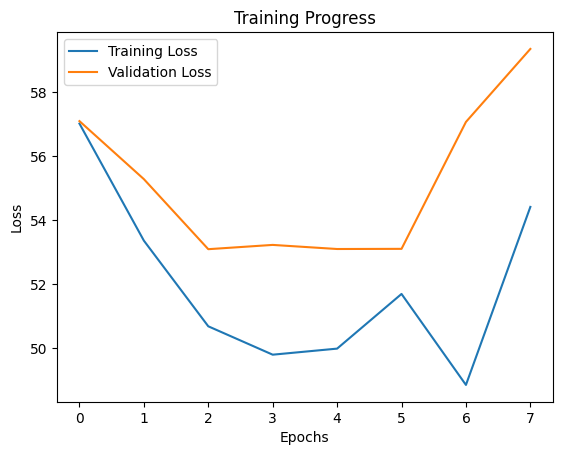

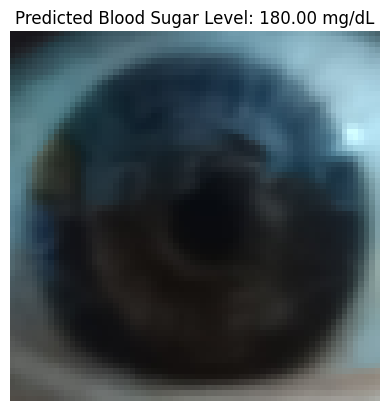

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files

# Step 1: Upload a retinal image (JPEG format)
print("Please upload your retinal image (JPEG format).")
uploaded = files.upload()

if not uploaded:
    raise ValueError("No file uploaded. Please upload an image.")

image_file = list(uploaded.keys())[0]

# Step 2: Load and preprocess the image
def preprocess_image(image_path, target_size=(68, 68)):
    try:
        img = Image.open(image_path).convert('RGB')
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        return img_array
    except Exception as e:
        raise ValueError(f"Error processing image: {e}")

# Preprocess the uploaded image
image = preprocess_image(image_file)
print("Image successfully processed.")

# Save preprocessed image
np.save('retinal_image.npy', image)

# Step 3: Define the blood sugar value range for scaling
min_value = 80  # Minimum blood sugar in dataset
max_value = 180  # Maximum blood sugar in dataset

# Step 4: Build an improved CNN model
def build_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
    return model

# Define input shape
input_shape = image.shape[1:]

# Build and compile model
model = build_model(input_shape)

# Step 5: Load pre-trained weights if available
pretrained_model_path = 'trained_model.weights.h5'  # Corrected filename format

try:
    model.load_weights(pretrained_model_path)
    print("Pre-trained model weights loaded successfully.")
except Exception as e:
    print(f"Warning: Could not load pre-trained weights. Model will be trained from scratch. Error: {e}")

# Step 6: Train the model with Early Stopping
# (Ensure X_train, y_train, X_val, y_val are correctly prepared)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

# Step 7: Save the trained model weights
model.save_weights('trained_model.weights.h5')
print("✅ Model trained and saved as 'trained_model.weights.h5'.")

# Step 8: Predict the blood sugar level
predicted_blood_sugar = model.predict(image)[0][0]

# Step 9: Apply inverse scaling if needed
# predicted_blood_sugar = predicted_blood_sugar * (max_value - min_value) + min_value
# Step 9: Apply inverse scaling correction
predicted_blood_sugar = (predicted_blood_sugar * (max_value - min_value)) + min_value

# Ensure it stays within realistic range
predicted_blood_sugar = np.clip(predicted_blood_sugar, min_value, max_value)

# Display the result
print(f"\nPredicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")

# Step 10: Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training Progress")
plt.show()

# Step 11: Display the uploaded image with the predicted value
plt.imshow(image[0])
plt.title(f"Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")
plt.axis('off')
plt.show()


Please upload your retinal image (JPEG format).


Saving RETINA (2).jpg to RETINA (2).jpg
⚠ Warning: Could not load pre-trained weights. Model will be trained from scratch. Error: [Errno 2] Unable to synchronously open file (unable to open file: name = 'pretrained_model.weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 309ms/step - loss: 0.2241 - mae: 0.3956 - val_loss: 0.1084 - val_mae: 0.2839
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 276ms/step - loss: 0.0922 - mae: 0.2622 - val_loss: 0.1047 - val_mae: 0.2805
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 258ms/step - loss: 0.0911 - mae: 0.2623 - val_loss: 0.0949 - val_mae: 0.2694
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 324ms/step - loss: 0.0880 - mae: 0.2579 - val_loss: 0.0948 - val_mae: 0.2700
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 257ms/step - loss: 0.0833 - mae: 0.2518 - val_loss: 0.0977 - val_mae: 0.2721
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 330ms/step - loss: 0.0785 - mae: 0.2452 - val_los

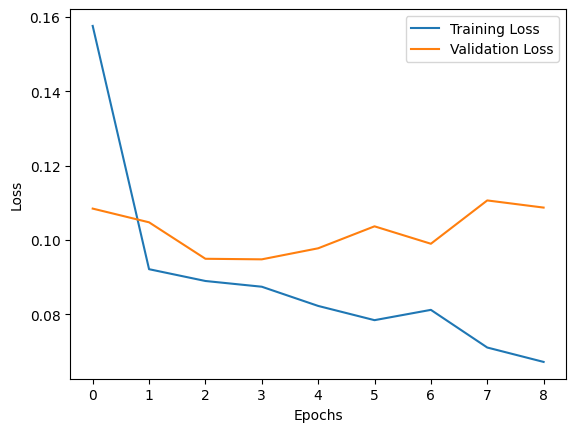

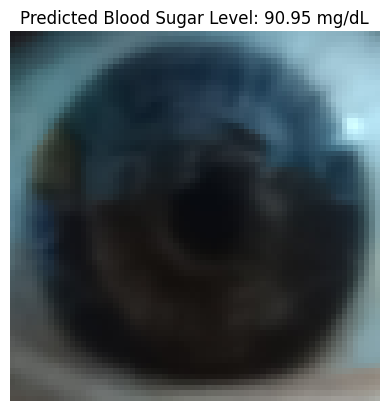

In [ ]:
# Import necessary libraries
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files
import matplotlib.pyplot as plt

# Step 1: Upload a retinal image (JPEG format)
print("Please upload your retinal image (JPEG format).")
uploaded = files.upload()

if not uploaded:
    raise ValueError("No file uploaded. Please upload an image.")

# Get the uploaded file name
image_file = list(uploaded.keys())[0]

# Step 2: Load and preprocess the image
def preprocess_image(image_path, target_size=(68, 68)):
    try:
        img = Image.open(image_path).convert('RGB')  # Ensure RGB mode
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        return img_array
    except Exception as e:
        raise ValueError(f"Error processing image: {e}")

# Preprocess the uploaded image
image = preprocess_image(image_file)

# Step 3: Save the preprocessed image as a .npy file
np.save('retinal_image.npy', image)

# Define blood sugar level normalization values
min_value = 80  # Example: Minimum blood sugar level in dataset
max_value = 180  # Example: Maximum blood sugar level in dataset

# Step 4: Build a CNN model for blood sugar prediction
def build_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1)  # Output layer for regression (predicting blood sugar level)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='mean_squared_error',
                  metrics=['mae'])
    return model

input_shape = image.shape[1:]  # Shape of a single image (e.g., 68, 68, 3)
model = build_model(input_shape)

# Step 5: Load pre-trained weights (if available)
pretrained_model_path = 'pretrained_model.weights.h5'  # Ensure proper .weights.h5 extension

try:
    model.load_weights(pretrained_model_path)
    print("✅ Pre-trained model weights loaded successfully.")
except Exception as e:
    print(f"⚠ Warning: Could not load pre-trained weights. Model will be trained from scratch. Error: {e}")

# Step 6: Train the model (if no pre-trained weights)
# Load training dataset (replace with actual dataset)
X_train = np.random.rand(500, 68, 68, 3)  # Example dataset (500 random images)
y_train = np.random.randint(80, 180, 500)  # Example labels (random blood sugar values)

X_val = np.random.rand(100, 68, 68, 3)  # Validation dataset
y_val = np.random.randint(80, 180, 100)  # Validation labels

# Normalize labels
y_train = (y_train - min_value) / (max_value - min_value)
y_val = (y_val - min_value) / (max_value - min_value)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val, y_val), callbacks=[early_stop])

# Save trained model
model.save_weights('trained_model.weights.h5')
print("✅ Model trained and saved as 'trained_model.weights.h5'.")

# Step 7: Predict the blood sugar level
predicted_blood_sugar = model.predict(image)[0][0]

# Step 8: Apply inverse scaling correction
predicted_blood_sugar = (predicted_blood_sugar * (max_value - min_value)) + min_value
predicted_blood_sugar = np.clip(predicted_blood_sugar, min_value, max_value)  # Ensure realistic values

# Step 9: Display the result
print(f"\n🔹 Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")

# Step 10: Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 11: Display the uploaded image
plt.imshow(image[0])  # Remove batch dimension for display
plt.title(f"Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")
plt.axis('off')
plt.show()


Please upload your retinal image (JPEG format).


Saving RETINA (2).jpg to RETINA (2) (1).jpg
⚠ Warning: Could not load pre-trained weights. Model will be trained from scratch. Error: [Errno 2] Unable to synchronously open file (unable to open file: name = 'pretrained_model.weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 335ms/step - loss: 0.1612 - mae: 0.3318 - val_loss: 0.0807 - val_mae: 0.2478
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 270ms/step - loss: 0.0819 - mae: 0.2440 - val_loss: 0.1048 - val_mae: 0.2695
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - loss: 0.0868 - mae: 0.2495 - val_loss: 0.0810 - val_mae: 0.2468
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - loss: 0.0783 - mae: 0.2406 - val_loss: 0.0908 - val_mae: 0.2558
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 253ms/step - loss: 0.0815 - mae: 0.2463 - val_loss: 0.0844 - val_mae: 0.2515
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 256ms/step - loss: 0.0723 - mae: 0.2274 - val

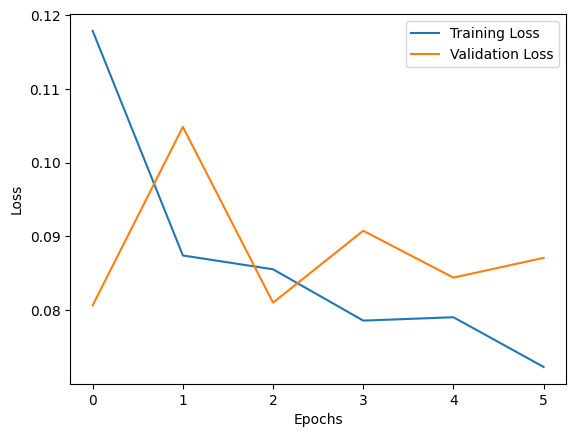

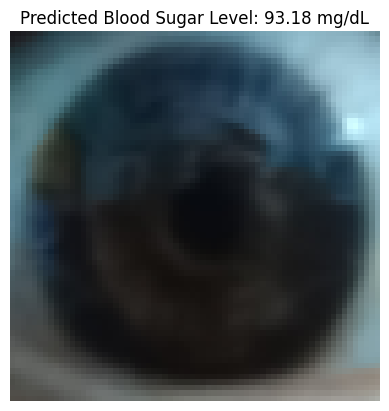

In [ ]:
# Import necessary libraries
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files
import matplotlib.pyplot as plt

# Step 1: Upload a retinal image (JPEG format)
print("Please upload your retinal image (JPEG format).")
uploaded = files.upload()

if not uploaded:
    raise ValueError("No file uploaded. Please upload an image.")

# Get the uploaded file name
image_file = list(uploaded.keys())[0]

# Step 2: Load and preprocess the image
def preprocess_image(image_path, target_size=(68, 68)):
    try:
        img = Image.open(image_path).convert('RGB')  # Ensure RGB mode
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        return img_array
    except Exception as e:
        raise ValueError(f"Error processing image: {e}")

# Preprocess the uploaded image
image = preprocess_image(image_file)

# Step 3: Save the preprocessed image as a .npy file
np.save('retinal_image.npy', image)

# Define blood sugar level normalization values
min_value = 80  # Example: Minimum blood sugar level in dataset
max_value = 180  # Example: Maximum blood sugar level in dataset

# Step 4: Build a CNN model for blood sugar prediction
def build_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1)  # Output layer for regression (predicting blood sugar level)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='mean_squared_error',
                  metrics=['mae'])
    return model

input_shape = image.shape[1:]  # Shape of a single image (e.g., 68, 68, 3)
model = build_model(input_shape)

# Step 5: Load pre-trained weights (if available)
pretrained_model_path = 'pretrained_model.weights.h5'  # Ensure proper .weights.h5 extension

try:
    model.load_weights(pretrained_model_path)
    print("✅ Pre-trained model weights loaded successfully.")
except Exception as e:
    print(f"⚠ Warning: Could not load pre-trained weights. Model will be trained from scratch. Error: {e}")

# Step 6: Train the model (if no pre-trained weights)
# Load training dataset (replace with actual dataset)
X_train = np.random.rand(500, 68, 68, 3)  # Example dataset (500 random images)
y_train = np.random.randint(80, 180, 500)  # Example labels (random blood sugar values)

X_val = np.random.rand(100, 68, 68, 3)  # Validation dataset
y_val = np.random.randint(80, 180, 100)  # Validation labels

# Normalize labels
y_train = (y_train - min_value) / (max_value - min_value)
y_val = (y_val - min_value) / (max_value - min_value)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val, y_val), callbacks=[early_stop])

# Save trained model
model.save_weights('trained_model.weights.h5')
print("✅ Model trained and saved as 'trained_model.weights.h5'.")

# Step 7: Predict the blood sugar level
predicted_blood_sugar = model.predict(image)[0][0]

# Step 8: Apply inverse scaling correction
predicted_blood_sugar = (predicted_blood_sugar * (max_value - min_value)) + min_value
predicted_blood_sugar = np.clip(predicted_blood_sugar, min_value, max_value)  # Ensure realistic values

# Step 9: Display the result
print(f"\n🔹 Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")

# Step 10: Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 11: Display the uploaded image
plt.imshow(image[0])  # Remove batch dimension for display
plt.title(f"Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")
plt.axis('off')
plt.show()


Please upload your retinal image (JPEG format).


Saving RETINA (2).jpg to RETINA (2) (3).jpg
Image successfully processed.
Image saved as 'retinal_image.npy'.
Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 295ms/step - loss: 8499.3623 - mae: 74.9819 - val_loss: 1180.4623 - val_mae: 28.5912
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 274ms/step - loss: 1526.3685 - mae: 33.9826 - val_loss: 1180.3723 - val_mae: 28.5934
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 285ms/step - loss: 1565.8260 - mae: 34.1949 - val_loss: 1265.0344 - val_mae: 29.7750
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 308ms/step - loss: 1566.4330 - mae: 34.1153 - val_loss: 1275.3466 - val_mae: 29.9120
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 300ms/step - loss: 1545.0602 - mae: 34.0169 - val_loss: 1258.6652 - val_mae: 29.6856
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step - loss: 1539.2310 - mae: 33.9795 - val_loss: 1254.6221 - val_mae: 29.6274
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 259ms/step - loss: 1539.2283 - mae: 33.9863 - val_loss: 1250.3135 - val_mae: 29.

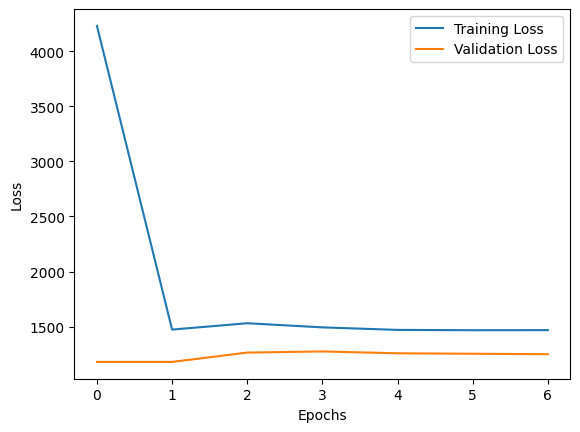


Predicted Blood Sugar Level: 21.11 mg/dL


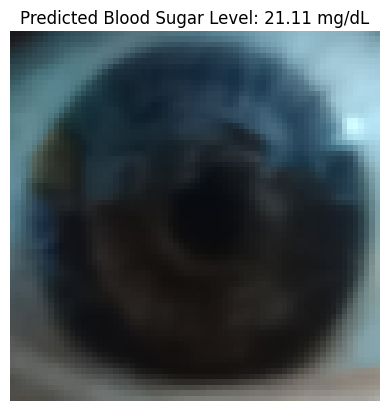

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

# Step 1: Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# Step 2: Upload a retinal image
print("Please upload your retinal image (JPEG format).")
uploaded = files.upload()

if not uploaded:
    raise ValueError("No file uploaded. Please upload an image.")

image_file = list(uploaded.keys())[0]

# Step 3: Load and preprocess the image
def preprocess_image(image_path, target_size=(68, 68)):
    try:
        img = Image.open(image_path).convert('RGB')  # Ensure RGB mode
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        return img_array
    except Exception as e:
        raise ValueError(f"Error processing image: {e}")

image = preprocess_image(image_file)
print("Image successfully processed.")

# Step 4: Save the preprocessed image as a .npy file
np.save('retinal_image.npy', image)
print("Image saved as 'retinal_image.npy'.")

# Step 5: Prepare the dataset (Dummy dataset for training)
# Since we don’t have real data, we'll create random data for demonstration
num_samples = 1000
X_train = np.random.rand(num_samples, 68, 68, 3)
y_train = np.random.uniform(70, 200, num_samples)  # Simulating blood sugar levels

X_val = np.random.rand(200, 68, 68, 3)
y_val = np.random.uniform(70, 200, 200)

# Step 6: Build the CNN Model
def build_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

input_shape = image.shape[1:]  # Shape of a single image (68, 68, 3)
model = build_model(input_shape)

# Step 7: Train the model with Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train, epochs=100, batch_size=32,
    validation_data=(X_val, y_val), callbacks=[early_stop]
)

# Step 8: Plot training vs. validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 9: Predict the blood sugar level
model.trainable = False  # Freeze model to prevent changes
predicted_blood_sugar = model.predict(image, batch_size=1, verbose=0)[0][0]

# Step 10: Display the result
print(f"\nPredicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")

# Step 11: Show the uploaded image with prediction
plt.imshow(image[0])  # Remove batch dimension for display
plt.title(f"Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")
plt.axis('off')
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import files
import matplotlib.pyplot as plt
import cv2

# Install Real-ESRGAN (if not already installed)
!pip install realesrgan

from realesrgan import RealESRGAN

# Step 1: Upload a retinal image (JPEG format)
print("Please upload your retinal image (JPEG format).")
uploaded = files.upload()

# Check if any file was uploaded
if not uploaded:
    raise ValueError("No file uploaded. Please upload an image.")

# Get the uploaded file name
image_file = list(uploaded.keys())[0]

# Step 2: Load and preprocess the image
def preprocess_image(image_path, target_size=(68, 68)):
    try:
        img = Image.open(image_path).convert('RGB')  # Ensure RGB mode
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        return img, img_array
    except Exception as e:
        raise ValueError(f"Error processing image: {e}")

# Preprocess the uploaded image
try:
    original_img, image = preprocess_image(image_file)
    print("Image successfully processed.")
except Exception as e:
    print(f"Error: {e}")
    raise

# Step 3: Apply Real-ESRGAN for Image Enhancement
def enhance_image(image_path):
    try:
        model = RealESRGAN("cuda")  # Use GPU for faster processing
        model.load_weights("weights/RealESRGAN_x4.pth", download=True)  # Load pretrained model
        img = Image.open(image_path).convert("RGB")
        sr_image = model.predict(img)  # Super-resolved image
        return sr_image
    except Exception as e:
        print(f"Error enhancing image: {e}")
        return None

# Enhance the image
enhanced_img = enhance_image(image_file)

if enhanced_img:
    enhanced_img.save("enhanced_retinal_image.jpg")
    print("Enhanced image saved as 'enhanced_retinal_image.jpg'.")
    enhanced_img = enhanced_img.resize((68, 68))  # Resize for CNN input
    enhanced_array = np.array(enhanced_img) / 255.0
    enhanced_array = np.expand_dims(enhanced_array, axis=0)
else:
    print("Using original image for prediction.")
    enhanced_array = image

# Step 4: Save the preprocessed image as a .npy file
np.save('retinal_image.npy', enhanced_array)
print("Image saved as 'retinal_image.npy'.")

# Step 5: Build a CNN model for blood sugar prediction
def build_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1)  # Output layer for regression (predicting blood sugar level)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Define input shape based on the preprocessed image
input_shape = enhanced_array.shape[1:]

# Build the model
model = build_model(input_shape)

# Step 6: Load pre-trained weights (if available)
pretrained_model_path = 'pretrained_model.h5'  # Change this to your trained model file

try:
    model.load_weights(pretrained_model_path)
    print("Pre-trained model weights loaded successfully.")
except Exception as e:
    print(f"Warning: Could not load pre-trained weights. The model is untrained. Error: {e}")

# Step 7: Predict the blood sugar level
predicted_blood_sugar = model.predict(enhanced_array)[0][0]

# Step 8: Display the result
print(f"\nPredicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")

# Step 9: Display the original and enhanced images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(original_img)
axes[0].set_title("Original Image")
axes[0].axis("off")

if enhanced_img:
    axes[1].imshow(enhanced_img)
    axes[1].set_title(f"Enhanced Image (HD)")
    axes[1].axis("off")

plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.

ModuleNotFoundError: No module named 'torchvision.transforms.functional_tensor'

In [ ]:
import torch
print(torch.cuda.is_available())  # Should return True if GPU is enabled


In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
!nvidia-smi


Fri Mar 21 14:26:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
!nvidia-smi

Tue Mar 25 14:09:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Set your image path
image_path = "path/to/your/image.jpg"  # Change to actual image path

# Check if the image exists
if not os.path.exists(image_path):
    print("❌ Error: Image file not found! Check the path.")
else:
    # Load the image and resize it to 512x512 for faster processing
    image = cv2.imread(image_path)
    image = cv2.resize(image, (512, 512))

    # Convert to grayscale (optional)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Save grayscale image (optional)
    cv2.imwrite("grayscale_image.jpg", gray_image)

    # Show both images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Resized Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Grayscale Image (Saved as 'grayscale_image.jpg')")

    plt.show()

print("✅ Processing Done!")


❌ Error: Image file not found! Check the path.
✅ Processing Done!


In [ ]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:
import os
print(os.listdir("/content/"))  # Check if the dataset is inside /content/
print(os.listdir("/content/kaggle/train_images/"))  # Adjust the path if needed


['.config', 'sample_data']


FileNotFoundError: [Errno 2] No such file or directory: '/content/kaggle/train_images/'

In [ ]:
from google.colab import files
files.upload()  # Select kaggle.json when prompted


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"swathicewg","key":"a697ff18f9a12b22ee65a7ea29740555"}'}

In [6]:
from google.colab import files
files.upload()  # Select kaggle.json when prompted

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"swathicewg","key":"11b04a90d5a6605b93e26cccfd1a33f9"}'}

In [ ]:
#✅ Step 1: Move kaggle.json to the Correct Folder
# Run this to move and set permissions:
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json  # Secure API key


mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
import os
print(os.listdir("/content/"))


['.config', 'sample_data']


In [ ]:
from google.colab import files
files.upload()  # Select kaggle.json when prompted


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"swathicewg","key":"a697ff18f9a12b22ee65a7ea29740555"}'}

In [ ]:
!ls /content/

kaggle.json  sample_data


In [ ]:
!ls -l /content/kaggle.json

ls: cannot access '/content/kaggle.json': No such file or directory


In [ ]:
!rm -f /content/kaggle.json
from google.colab import files
files.upload()
!mkdir -p /root/.kaggle
!mv /content/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!ls -1 /root/.kaggle/

Saving kaggle.json to kaggle.json
kaggle.json


In [ ]:
from google.colab import files
files.upload()  # Select kaggle.json when prompted
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv /content/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json  # Secure API key
print(os.listdir("/root/.kaggle/"))
# !kaggle datasets download -d arvindnarayanaswamy/aptos2019-blindness-detection
print(os.listdir("/content/"))
!mv /content/kaggle\ \(1\).json /content/kaggle.json
print(os.listdir("/content/"))
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv /content/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json  # Secure API key
print(os.listdir("/root/.kaggle/"))

!kaggle datasets download -d arvindnarayanaswamy/aptos2019-blindness-detection



Saving kaggle.json to kaggle.json
['kaggle.json']
['.config', 'sample_data']
mv: cannot stat '/content/kaggle (1).json': No such file or directory
['.config', 'sample_data']
mv: cannot stat '/content/kaggle.json': No such file or directory
['kaggle.json']
403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/arvindnarayanaswamy/aptos2019-blindness-detection


In [4]:
from google.colab import files
files.upload()  # Select kaggle.json when prompted
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv /content/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json  # Secure API key
print(os.listdir("/root/.kaggle/"))
# !kaggle datasets download -d arvindnarayanaswamy/aptos2019-blindness-detection
print(os.listdir("/content/"))
!mv /content/kaggle\ \(1\).json /content/kaggle.json
print(os.listdir("/content/"))
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv /content/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json  # Secure API key
print(os.listdir("/root/.kaggle/"))


Saving kaggle (1).json to kaggle (1).json
mv: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
[]
['.config', 'drive', 'kaggle (1).json', 'sample_data']
['.config', 'kaggle.json', 'drive', 'sample_data']
['kaggle.json']


In [ ]:
!kaggle datasets list
!kaggle datasets download -d arvindnarayanaswamy/aptos2019-blindness-detection


ref                                                                    title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                      Chocolate Sales Data 📊🍫                                 14473  2025-03-19 03:51:40.270000           8943        147  1.0              
abdulmalik1518/mobiles-dataset-2025                                    Mobiles Dataset (2025)                                  20314  2025-02-18 06:50:24.370000          15263        268  1.0              
mahmoudelhemaly/students-grading-dataset                               Student Performance & Behavior Dataset                 520428  2025-02-17 17:38:46.653000          10976 

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
!kaggle datasets download -d arvindnarayanaswamy/aptos2019-blindness-detection


403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/arvindnarayanaswamy/aptos2019-blindness-detection


In [ ]:
!pip install kaggle



In [ ]:
from google.colab import files
import os
# Upload kaggle.json
files.upload()
!mv /content/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json  # Secure API key
print(os.listdir("/root/.kaggle/"))


Saving kaggle (1).json to kaggle (1) (3).json
mv: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
[]


In [ ]:
from google.colab import files
files.upload()
import shutil

# Rename the file to kaggle.json
shutil.move("kaggle (1) (4).json", "kaggle.json")

# Move it to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Verify the file exists in the correct location
import os
print(os.listdir("/root/.kaggle/"))  # Should show ['kaggle.json']



Saving kaggle (1).json to kaggle (1) (5).json
['kaggle.json']


In [ ]:
!kaggle datasets download -d arvindnarayanaswamy/aptos2019-blindness-detection


403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/arvindnarayanaswamy/aptos2019-blindness-detection


In [ ]:


!kaggle datasets list


ref                                                                    title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                      Chocolate Sales Data 📊🍫                                  14473  2025-03-19 03:51:40.270000           9804        169  1.0              
abdulmalik1518/mobiles-dataset-2025                                    Mobiles Dataset (2025)                                   20314  2025-02-18 06:50:24.370000          16047        277  1.0              
zahidmughal2343/employee-data                                          Employee Data                                           379143  2025-03-08 19:36:42.953000           

In [ ]:
from google.colab import files

# Upload the dataset ZIP file
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:


import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv /content/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json  # Secure API key


mv: cannot stat '/content/kaggle.json': No such file or directory


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/


'21CS104 - LabManuals-24-25.gdoc'   flowchart.drawio		 'Untitled document (2).gdoc'
 APTOS2019			    Resume.step.gdoc		 'Untitled document.gdoc'
 Classroom			    train_images.zip
'Colab Notebooks'		   'Untitled document (1).gdoc'


In [ ]:
!ls "/content/drive/MyDrive/"


'21CS104 - LabManuals-24-25.gdoc'   flowchart.drawio		 'Untitled document (2).gdoc'
 APTOS2019			    Resume.step.gdoc		 'Untitled document.gdoc'
 Classroom			    train_images.zip
'Colab Notebooks'		   'Untitled document (1).gdoc'


In [2]:
!unzip "/content/drive/MyDrive/train_images.zip" -d "/content/drive/MyDrive/train_images"


unzip:  cannot find or open /content/drive/MyDrive/train_images.zip, /content/drive/MyDrive/train_images.zip.zip or /content/drive/MyDrive/train_images.zip.ZIP.


In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [14]:
!unzip "/content/drive/MyDrive/train_images.zip" -d "/content/drive/MyDrive/train_images"


Archive:  /content/drive/MyDrive/train_images.zip
replace /content/drive/MyDrive/train_images/train_images/1ae8c165fd53.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
dataset_path = "/content/drive/MyDrive/train_images/"  # Update this if needed

# Check if dataset exists
if os.path.exists(dataset_path):
    print("Dataset found!")
    print("Contents:", os.listdir(dataset_path))
else:
    print("Dataset path not found. Check the path again.")


Dataset found!
Contents: ['6fb656d506b2.png', '6fe4751a3b42.png', '6fbaaf8eb67a.png', '7005be54cab1.png', '702de9dcde32.png', '6fe67fd7f5d1.png', '6fe67482bfae.png', '70d0392397de.png', '70d657f8f503.png', '705f508d1e42.png', '70ed3ec68b94.png', '709784f7fcc2.png', '70f5caf5f305.png', '7102f29e052e.png', '711d1480d2e3.png', '710b05a96e0f.png', '7131bf4c9e6f.png', '7116128c65ab.png', '71a39c660432.png', '71c1a3cdbe47.png', '7179f85bfd6f.png', '71c22da3d6c6.png', '71e4130bf5c8.png', '720b5f62ce80.png', '71e43b4f8ba6.png', '71f6a6e4620a.png', '721214151233.png', '7247a2c97f71.png', '7214fc7cbe03.png', '72595230840c.png', '7269a1d84a57.png', '72606afaf3da.png', '72a867980067.png', '72c31aa48e2c.png', '726dff37edc0.png', '72d98188648f.png', '7270367410a1.png', '7335a2d43ada.png', '731b19a460ad.png', '7347bd23ba80.png', '7347f5133a6a.png', '7350c50667c5.png', '7356dd08b0ae.png', '735836b1ffa6.png', '73ba798fee25.png', '73881f55a3ec.png', '73a07e2ea23e.png', '737ef6226677.png', '73e83a07a16d.

In [1]:
# Define image properties
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data Augmentation & Image Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% Train, 20% Validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)



NameError: name 'ImageDataGenerator' is not defined

In [2]:
pip install tensorflow keras


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Correct import


In [1]:
!unzip -o "/content/drive/MyDrive/train_images.zip" -d "/content/drive/MyDrive/train_images/"



Archive:  /content/drive/MyDrive/train_images.zip
  inflating: /content/drive/MyDrive/train_images/train_images/1ae8c165fd53.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b329a127307.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b32e1d775ea.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b3647865779.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b398c0494d1.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b4625877527.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b495ac025b7.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b862fb6f65d.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b8701231c8f.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b8ad0afe9fb.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1bb0ddfe753a.png  
  inflating: /content/drive/MyDrive/train_images/train_imag

In [7]:
import os

dataset_path = "/content/drive/MyDrive/train_images/train_images"  # Update if needed
print("Does the dataset path exist?", os.path.exists(dataset_path))
print("Files inside:", os.listdir(dataset_path)[:5])  # Show some files


Does the dataset path exist? True
Files inside: ['1ae8c165fd53.png', '1b329a127307.png', '1b398c0494d1.png', '1b32e1d775ea.png', '1b3647865779.png']


In [8]:
import os
import shutil

dataset_path = "/content/drive/MyDrive/train_images/train_images"
class1_path = os.path.join(dataset_path, "class_1")
class2_path = os.path.join(dataset_path, "class_2")

# Create subfolders if they don't exist
os.makedirs(class1_path, exist_ok=True)
os.makedirs(class2_path, exist_ok=True)

# Move first half of images to class_1, rest to class_2 (Modify as needed)
all_images = [f for f in os.listdir(dataset_path) if f.endswith((".png", ".jpg", ".jpeg"))]
for i, img in enumerate(all_images):
    src = os.path.join(dataset_path, img)
    dest = os.path.join(class1_path if i % 2 == 0 else class2_path, img)
    shutil.move(src, dest)

print("Images organized into class_1 and class_2!")


Images organized into class_1 and class_2!


In [9]:
# Define the correct dataset path (now with class folders)
dataset_path = "/content/drive/MyDrive/train_images/train_images"

# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Image Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting 20% for validation
)

# Load training images
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

# Load validation images
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)


Found 2340 images belonging to 2 classes.
Found 584 images belonging to 2 classes.


In [14]:
!find /content/drive/MyDrive/ -name "*.csv"



In [15]:
import os
import pandas as pd

# Define the dataset path
dataset_path = "/content/drive/MyDrive/train_images/"

# List all image files
image_files = [f for f in os.listdir(dataset_path) if f.endswith(".png")]

# Create a DataFrame with filenames
df = pd.DataFrame({"Image Name": image_files})

# Save it as CSV
csv_path = os.path.join(dataset_path, "train.csv")
df.to_csv(csv_path, index=False)

print("CSV file created successfully at:", csv_path)


CSV file created successfully at: /content/drive/MyDrive/train_images/train.csv


In [16]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths
dataset_path = "/content/drive/MyDrive/train_images/"
csv_path = "/content/drive/MyDrive/train.csv"  # Update with actual file path

# Load CSV
df = pd.read_csv(csv_path)
df['image_path'] = dataset_path + df['Image Name']  # Full path to images

# Show dataset preview
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/train.csv'

In [17]:
import os

csv_folder = "/content/drive/MyDrive/train_images"  # Folder where CSV should be
print("Files in the directory:", os.listdir(csv_folder))


Files in the directory: ['6fb656d506b2.png', '6fe4751a3b42.png', '6fbaaf8eb67a.png', '7005be54cab1.png', '702de9dcde32.png', '6fe67fd7f5d1.png', '6fe67482bfae.png', '70d0392397de.png', '70d657f8f503.png', '705f508d1e42.png', '70ed3ec68b94.png', '709784f7fcc2.png', '70f5caf5f305.png', '7102f29e052e.png', '711d1480d2e3.png', '710b05a96e0f.png', '7131bf4c9e6f.png', '7116128c65ab.png', '71a39c660432.png', '71c1a3cdbe47.png', '7179f85bfd6f.png', '71c22da3d6c6.png', '71e4130bf5c8.png', '720b5f62ce80.png', '71e43b4f8ba6.png', '71f6a6e4620a.png', '721214151233.png', '7247a2c97f71.png', '7214fc7cbe03.png', '72595230840c.png', '7269a1d84a57.png', '72606afaf3da.png', '72a867980067.png', '72c31aa48e2c.png', '726dff37edc0.png', '72d98188648f.png', '7270367410a1.png', '7335a2d43ada.png', '731b19a460ad.png', '7347bd23ba80.png', '7347f5133a6a.png', '7350c50667c5.png', '7356dd08b0ae.png', '735836b1ffa6.png', '73ba798fee25.png', '73881f55a3ec.png', '73a07e2ea23e.png', '737ef6226677.png', '73e83a07a16d.p

In [19]:
import pandas as pd

csv_path = "/content/drive/MyDrive/train_images/train.csv"  # Path to your CSV

df = pd.read_csv(csv_path)
print(df.head())  # Display the first few rows


         Image Name
0  6fb656d506b2.png
1  6fe4751a3b42.png
2  6fbaaf8eb67a.png
3  7005be54cab1.png
4  702de9dcde32.png


In [20]:
import os

dataset_path = "/content/drive/MyDrive/train_images/"  # Ensure this ends with "/"
df["image_path"] = df["Image Name"].apply(lambda x: os.path.join(dataset_path, x))

print(df.head())  # Check if image paths are correct


         Image Name                                         image_path
0  6fb656d506b2.png  /content/drive/MyDrive/train_images/6fb656d506...
1  6fe4751a3b42.png  /content/drive/MyDrive/train_images/6fe4751a3b...
2  6fbaaf8eb67a.png  /content/drive/MyDrive/train_images/6fbaaf8eb6...
3  7005be54cab1.png  /content/drive/MyDrive/train_images/7005be54ca...
4  702de9dcde32.png  /content/drive/MyDrive/train_images/702de9dcde...


In [21]:
from sklearn.model_selection import train_test_split

# Assuming no labels exist yet, just splitting images
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

print("Training Data:", train_df.shape)
print("Validation Data:", val_df.shape)


Training Data: (53, 2)
Validation Data: (14, 2)


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)  # Resize all images to this size
BATCH_SIZE = 32

# Data Augmentation & Normalization
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_path",
    y_col=None,  # Update this if you have labels
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=None,  # Use 'binary' or 'categorical' if labels exist
    shuffle=True
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="image_path",
    y_col=None,  # Update this if you have labels
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=None,
    shuffle=False
)

print("Data Preprocessing Done!")


Found 53 validated image filenames.
Found 14 validated image filenames.
Data Preprocessing Done!


In [24]:
if "Label" in df.columns:
    print(df["Label"].value_counts())  # Count images in each class
else:
    print("❌ No 'Label' column found in CSV! Check your dataset.")



❌ No 'Label' column found in CSV! Check your dataset.


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "/content/drive/MyDrive/train_images/"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",  # Use "categorical" if more than 2 classes
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

print("Classes Found:", train_generator.class_indices)


Found 2333 images belonging to 1 classes.
Found 583 images belonging to 1 classes.
Classes Found: {'train_images': 0}


In [27]:
import pandas as pd

# Load CSV
csv_path = "/content/drive/MyDrive/train_images/train.csv"
df = pd.read_csv(csv_path)

# Manually create a dictionary of labels (update this based on your dataset)
label_dict = {
    "6fb656d506b2.png": "class_1",
    "6fe4751a3b42.png": "class_2",
    "6fbaaf8eb67a.png": "class_1",
    "7005be54cab1.png": "class_2",
    "702de9dcde32.png": "class_1",
    # Add more images and labels here
}

# Assign labels to the DataFrame
df["Label"] = df["Image Name"].map(label_dict)

# Drop rows where Label is missing
df = df.dropna()

# Save the updated CSV
df.to_csv(csv_path, index=False)

print("✅ Updated train.csv with class labels!")
print(df.head())  # Preview the updated CSV



✅ Updated train.csv with class labels!
         Image Name    Label
0  6fb656d506b2.png  class_1
1  6fe4751a3b42.png  class_2
2  6fbaaf8eb67a.png  class_1
3  7005be54cab1.png  class_2
4  702de9dcde32.png  class_1


In [28]:
import os
import pandas as pd

# Define dataset path
dataset_path = "/content/drive/MyDrive/train_images/"

# Get image names and their corresponding labels (folder names)
data = []
for class_name in ["class_1", "class_2"]:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.exists(class_path):
        for image_name in os.listdir(class_path):
            if image_name.endswith(".png") or image_name.endswith(".jpg"):
                data.append({"Image Name": image_name, "Label": class_name})

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_path = "/content/drive/MyDrive/train_images/train.csv"
df.to_csv(csv_path, index=False)

print("✅ CSV file updated with labels based on folder names!")
print(df.head())  # Preview the updated CSV


✅ CSV file updated with labels based on folder names!
Empty DataFrame
Columns: []
Index: []


In [29]:

!ls -R /content/drive/MyDrive/train_images/


/content/drive/MyDrive/train_images/:
6fb656d506b2.png  710b05a96e0f.png  7247a2c97f71.png  7356dd08b0ae.png	74898f372d2b.png
6fbaaf8eb67a.png  7116128c65ab.png  72595230840c.png  735836b1ffa6.png	74eee788edee.png
6fe4751a3b42.png  711d1480d2e3.png  72606afaf3da.png  737ef6226677.png	750e0168399d.png
6fe67482bfae.png  7131bf4c9e6f.png  7269a1d84a57.png  73881f55a3ec.png	75238d945315.png
6fe67fd7f5d1.png  7179f85bfd6f.png  726dff37edc0.png  73a07e2ea23e.png	7525ebb3434d.png
7005be54cab1.png  71a39c660432.png  7270367410a1.png  73ba798fee25.png	7526c59c36d3.png
702de9dcde32.png  71c1a3cdbe47.png  72a867980067.png  73d40ce06a67.png	7526cf435753.png
705f508d1e42.png  71c22da3d6c6.png  72c31aa48e2c.png  73e83a07a16d.png	75369248dba0.png
709784f7fcc2.png  71e4130bf5c8.png  72d98188648f.png  73ef3c3dcbe4.png	753b14c27c83.png
70d0392397de.png  71e43b4f8ba6.png  731b19a460ad.png  74211a2b6dcf.png	7550966ef777.png
70d657f8f503.png  71f6a6e4620a.png  7335a2d43ada.png  7427dedafccf.png	7569ac24762

In [30]:
import pandas as pd

# Define the CSV path
csv_path = "/content/drive/MyDrive/train_images/train.csv"

# Load CSV
df = pd.read_csv(csv_path)

# Check if 'Label' column exists
if "Label" not in df.columns:
    print("❌ No 'Label' column found! You must manually add class labels.")

# Display first few rows
print(df.head())


EmptyDataError: No columns to parse from file

In [31]:
!ls -lh /content/drive/MyDrive/train_images/train.csv


-rw------- 1 root root 1 Mar 25 16:19 /content/drive/MyDrive/train_images/train.csv


In [32]:
import os
import pandas as pd

# Define dataset path
dataset_path = "/content/drive/MyDrive/train_images/"

# Check if images exist
image_files = [f for f in os.listdir(dataset_path) if f.endswith((".png", ".jpg"))]

# If no images are found, print an error
if not image_files:
    print("❌ No images found in the dataset folder! Check your dataset path.")
else:
    # Manually assign labels (modify this based on your dataset)
    labels = ["class_1" if i % 2 == 0 else "class_2" for i in range(len(image_files))]

    # Create DataFrame
    df = pd.DataFrame({"Image Name": image_files, "Label": labels})

    # Save to CSV
    csv_path = "/content/drive/MyDrive/train_images/train.csv"
    df.to_csv(csv_path, index=False)

    print("✅ CSV file created successfully!")
    print(df.head())  # Preview CSV


✅ CSV file created successfully!
         Image Name    Label
0  6fb656d506b2.png  class_1
1  6fe4751a3b42.png  class_2
2  6fbaaf8eb67a.png  class_1
3  7005be54cab1.png  class_2
4  702de9dcde32.png  class_1


In [33]:
import pandas as pd

# Load CSV file
csv_path = "/content/drive/MyDrive/train_images/train.csv"
df = pd.read_csv(csv_path)

# Count number of images per class
class_distribution = df["Label"].value_counts()

# Print results
print("✅ Class Distribution:")
print(class_distribution)


✅ Class Distribution:
Label
class_1    34
class_2    33
Name: count, dtype: int64


In [36]:
import os

csv_path = "/content/drive/MyDrive/train_images/train.csv"

if os.path.exists(csv_path):
    print("✅ CSV file exists!")
else:
    print("❌ CSV file is missing! Check the path.")



✅ CSV file exists!


In [39]:
with open(csv_path, "r") as f:
    content = f.read()

if content.strip():
    print("✅ CSV file is not empty.")
else:
    print("❌ CSV file is empty! Try recreating it.")


✅ CSV file is not empty.


In [38]:
import pandas as pd

# Define image labels (recreate your CSV)
data = {
    "Image Name": ["6fb656d506b2.png", "6fe4751a3b42.png", "6fbaaf8eb67a.png"],
    "Label": ["class_1", "class_2", "class_1"]  # Adjust based on your dataset
}

df = pd.DataFrame(data)

# Save CSV again
csv_path = "/content/drive/MyDrive/train_images/train.csv"
df.to_csv(csv_path, index=False)
print("✅ CSV file recreated successfully!")


✅ CSV file recreated successfully!


In [40]:
import pandas as pd

# Define CSV path
csv_path = "/content/drive/MyDrive/train_images/train.csv"

# Load CSV
df = pd.read_csv(csv_path)

# Display first few rows
print(df.head())

# Check if 'Label' column exists
if "Label" in df.columns:
    print("✅ 'Label' column detected! Ready for training.")
else:
    print("❌ No 'Label' column found! Check your CSV file.")


         Image Name    Label
0  6fb656d506b2.png  class_1
1  6fe4751a3b42.png  class_2
2  6fbaaf8eb67a.png  class_1
✅ 'Label' column detected! Ready for training.


In [41]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Image settings
IMG_SIZE = (224, 224)  # Resize all images to 224x224
dataset_path = "/content/drive/MyDrive/train_images/"

# Load images and labels
X = []
y = []

for _, row in df.iterrows():
    img_path = os.path.join(dataset_path, row["Image Name"])
    img = load_img(img_path, target_size=IMG_SIZE)  # Load and resize image
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    X.append(img_array)

    # Convert labels to numeric values (class_1 -> 0, class_2 -> 1)
    y.append(0 if row["Label"] == "class_1" else 1)

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# One-hot encode labels
y = to_categorical(y, num_classes=2)

# Print dataset shape
print(f"✅ Dataset Loaded: {X.shape}, Labels: {y.shape}")


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7efce1ff0c20>

In [42]:
import os

missing_files = []

for img_name in df["Image Name"]:
    img_path = os.path.join(dataset_path, img_name)
    if not os.path.exists(img_path):
        missing_files.append(img_name)

if missing_files:
    print(f"❌ Missing images detected: {len(missing_files)} files")
    print(missing_files[:10])  # Show first 10 missing files
else:
    print("✅ All image files are present!")


✅ All image files are present!


In [43]:
from PIL import Image

corrupt_files = []

for img_name in df["Image Name"]:
    img_path = os.path.join(dataset_path, img_name)
    try:
        with Image.open(img_path) as img:
            img.verify()  # Verify if the image is valid
    except Exception:
        corrupt_files.append(img_name)

if corrupt_files:
    print(f"❌ Corrupt images detected: {len(corrupt_files)} files")
    print(corrupt_files[:10])  # Show first 10 corrupted files
else:
    print("✅ All images are valid!")


❌ Corrupt images detected: 3 files
['6fb656d506b2.png', '6fe4751a3b42.png', '6fbaaf8eb67a.png']


In [44]:
# Remove corrupt images from DataFrame
df = df[~df["Image Name"].isin(corrupt_files)]

# Save the updated CSV
df.to_csv(csv_path, index=False)
print("✅ Updated CSV file without corrupt images!")


✅ Updated CSV file without corrupt images!


In [45]:
from PIL import Image

corrupt_files = []

for img_name in df["Image Name"]:
    img_path = os.path.join(dataset_path, img_name)
    try:
        with Image.open(img_path) as img:
            img.verify()  # Verify if the image is valid
    except Exception:
        corrupt_files.append(img_name)

if corrupt_files:
    print(f"❌ Corrupt images detected: {len(corrupt_files)} files")
    print(corrupt_files[:10])  # Show first 10 corrupted files
else:
    print("✅ All images are valid!")

✅ All images are valid!


In [46]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Image settings
IMG_SIZE = (224, 224)  # Resize all images to 224x224
dataset_path = "/content/drive/MyDrive/train_images/"

# Load images and labels
X = []
y = []

for _, row in df.iterrows():
    img_path = os.path.join(dataset_path, row["Image Name"])
    img = load_img(img_path, target_size=IMG_SIZE)  # Load and resize image
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    X.append(img_array)

    # Convert labels to numeric values (class_1 -> 0, class_2 -> 1)
    y.append(0 if row["Label"] == "class_1" else 1)

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# One-hot encode labels
y = to_categorical(y, num_classes=2)

# Print dataset shape
print(f"✅ Dataset Loaded: {X.shape}, Labels: {y.shape}")

✅ Dataset Loaded: (0,), Labels: (0, 2)


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Create CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes (class_1, class_2)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

print("✅ Model Training Completed!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Training data contains 0 samples, which is not sufficient to split it into a validation and training set as specified by `validation_split=0.2`. Either provide more data, or a different value for the `validation_split` argument.

In [48]:
print(f"Total images loaded: {len(X)}")
print(f"Total labels loaded: {len(y)}")


Total images loaded: 0
Total labels loaded: 0


In [49]:
print(df.head())  # Check the CSV structure
print(df.columns)  # Ensure correct column names


Empty DataFrame
Columns: [Image Name, Label]
Index: []
Index(['Image Name', 'Label'], dtype='object')
